In [5]:
import joblib
import numpy as np
import umap as umap
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load the data
data = joblib.load('dataset_numeric.pkl')
# data['input_resistance'] = np.log10(data['input_resistance'].astype(float))
# data["ap_1_width_0_long_square"] = np.log10(data["ap_1_width_0_long_square"]*1000)
# #do the same for the tau
# data["tau"] = np.log10(data["tau"]*1000)
data = data.dropna()

# #clip data to 95th percentile
# for col in data.select_dtypes(include=[np.number]).columns:
#     upper_bound = data[col].quantile(0.95)
#     lower_bound = data[col].quantile(0.05)
#     data = data[(data[col] <= upper_bound) & (data[col] >= lower_bound)]
# # Select numeric columns for UMAP
# numeric_data = data.select_dtypes(include=[np.number])


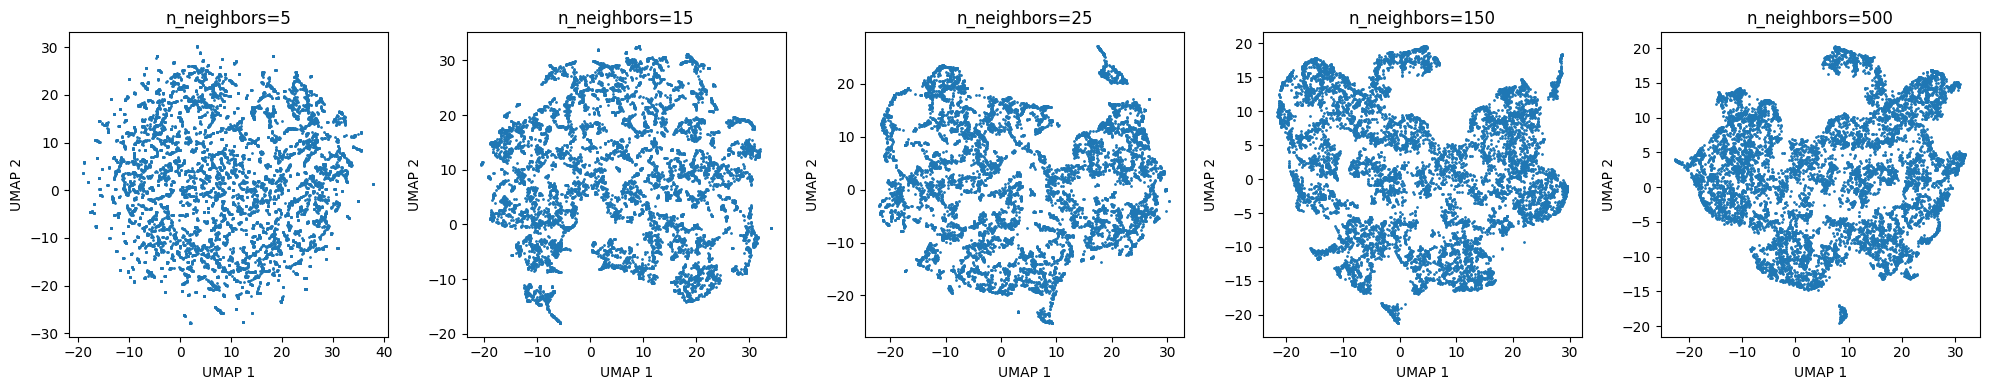

In [7]:
#try to make a non-blobby umap with grid scan
n_neighbors_values = [5, 15, 25, 150, 500]

fig, axes = plt.subplots(1, len(n_neighbors_values), figsize=(20, 4))

for i, n_neighbors in enumerate(n_neighbors_values):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=0.1, spread=2, repulsion_strength=5, metric='cosine')
    embedding = reducer.fit_transform(data)
    
    axes[i].plot(embedding[:,0], embedding[:,1], 'o', markersize=1)
    axes[i].set_title(f'n_neighbors={n_neighbors}')
    axes[i].set_xlabel('UMAP 1')
    axes[i].set_ylabel('UMAP 2')

plt.tight_layout()
plt.show()


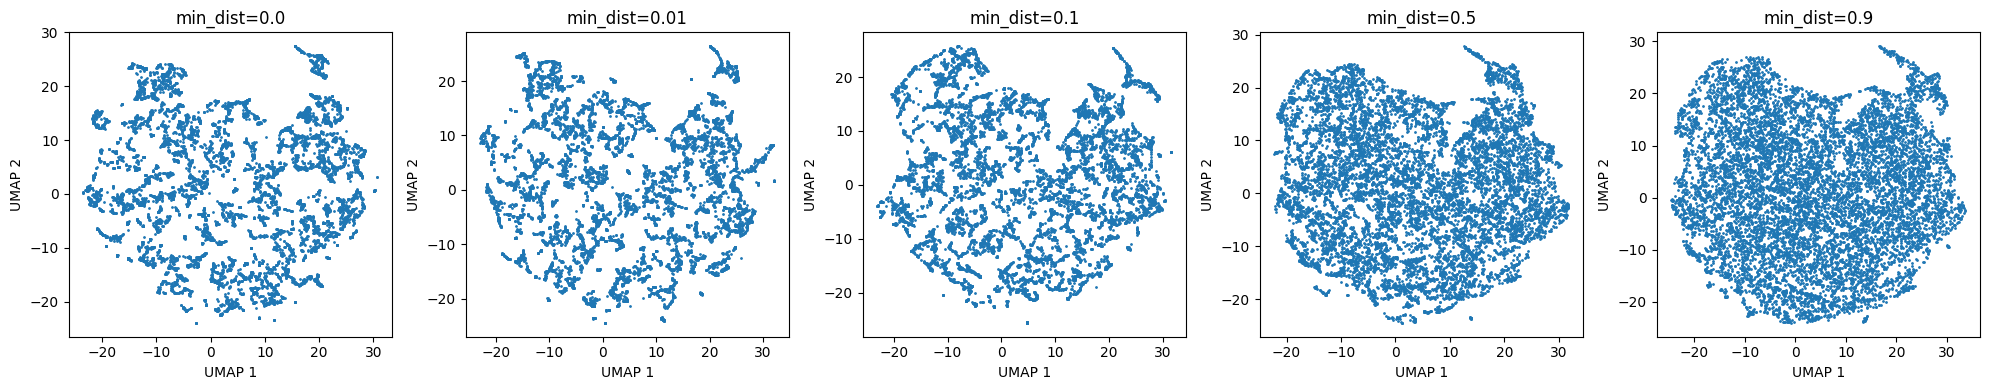

In [8]:
#try with different min_dist values
min_dist_values = [0.0, 0.01, 0.1, 0.5, 0.9]
fig, axes = plt.subplots(1, len(min_dist_values), figsize=(20, 4))
for i, min_dist in enumerate(min_dist_values):
    reducer = umap.UMAP(n_neighbors=15, min_dist=min_dist, spread=2, repulsion_strength=5, metric='cosine')
    embedding = reducer.fit_transform(data)
    
    axes[i].plot(embedding[:,0], embedding[:,1], 'o', markersize=1)
    axes[i].set_title(f'min_dist={min_dist}')
    axes[i].set_xlabel('UMAP 1')
    axes[i].set_ylabel('UMAP 2')
plt.tight_layout()
plt.show()